<a href="https://colab.research.google.com/github/Ayxux/NLP_Minor_Project/blob/main/Twitter_US_NLP_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"CUDA is available! GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA Capability: {torch.cuda.get_device_capability(0)}")

    # Get GPU properties
    gpu_properties = torch.cuda.get_device_properties(0)
    print(f"Total CUDA Cores: {gpu_properties.multi_processor_count * 64}")  # Approximate calculation
    print(f"Total Memory: {gpu_properties.total_memory / (1024**3):.2f} GB")
else:
    print("CUDA is not available. Running on CPU.")

CUDA is not available. Running on CPU.


In [ ]:
!git clone https://github.com/Ayxux/NLP_Minor_Project

Cloning into 'NLP_Minor_Project'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 113 (delta 41), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (113/113), 808.67 KiB | 2.71 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [ ]:
%cd /content/NLP_Minor_Project/

!pip install -r REQUIREMENTS.txt



/content/NLP_Minor_Project
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.24.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy-3.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (25 kB)
  Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
  Using cached scikit_learn-1.2.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached torch-2.0.0-cp311-cp311-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached transformers-4.26.1-py3-none-any.whl.metadata (100 kB)
  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached matplotlib-3.7.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached sea

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/data/tweets_dataset

/content/drive/MyDrive/tweets_dataset


In [ ]:
import os
os.listdir('/content/drive/MyDrive/data/tweets_dataset')

['database.sqlite', 'Tweets.csv']

# **Reading Data**

In [ ]:
import pandas as pd
import sqlite3
# Load the datasets
csv_path = '/content/drive/MyDrive/data/tweets_dataset/Tweets.csv'
sqlite_path = '/content/drive/MyDrive/data/tweets_dataset/database.sqlite'

# Read the CSV file
tweets_df = pd.read_csv(csv_path)

# Read the SQLite database (Table name: 'Tweets')
conn = sqlite3.connect(sqlite_path)
sqlite_df = pd.read_sql_query("SELECT * FROM Tweets", conn)
conn.close()

# Check the first few rows of the datasets
tweets_df.head(), sqlite_df.head()

(             tweet_id airline_sentiment  airline_sentiment_confidence  \
 0  570306133677760513           neutral                        1.0000   
 1  570301130888122368          positive                        0.3486   
 2  570301083672813571           neutral                        0.6837   
 3  570301031407624196          negative                        1.0000   
 4  570300817074462722          negative                        1.0000   
 
   negativereason  negativereason_confidence         airline  \
 0            NaN                        NaN  Virgin America   
 1            NaN                     0.0000  Virgin America   
 2            NaN                        NaN  Virgin America   
 3     Bad Flight                     0.7033  Virgin America   
 4     Can't Tell                     1.0000  Virgin America   
 
   airline_sentiment_gold        name negativereason_gold  retweet_count  \
 0                    NaN     cairdin                 NaN              0   
 1              

## **EDA + Data pre-processing** (cleanup, tokenization, stopword removal, lemmatization and vectorization)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

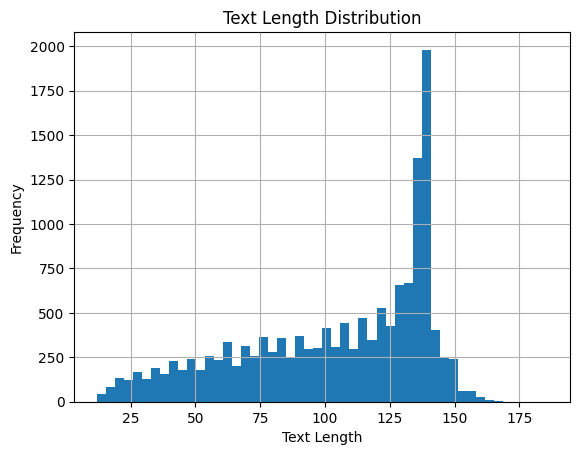

<ipython-input-22-8c5244e248b3>:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tweets_df["text"].fillna("", inplace=True)


TF-IDF Vectorized Shape: (14640, 10000)


In [ ]:
# 1. Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sqlite3
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import spacy

nltk.download('stopwords')
nltk.download('punkt')

nlp = spacy.load("en_core_web_sm")

# 2. Loading Dataset
csv_path = "/content/drive/MyDrive/data/tweets_dataset/Tweets.csv"
sqlite_path = "/content/drive/MyDrive/data/tweets_dataset/database.sqlite"

# Read CSV File
tweets_df = pd.read_csv(csv_path)

# Read SQLite Database
conn = sqlite3.connect(sqlite_path)
sqlite_df = pd.read_sql_query("SELECT * FROM Tweets", conn)
conn.close()

# 3. EDA
print(tweets_df.head())
print(tweets_df.info())
print(tweets_df.isnull().sum())

# Class Distribution (Modify if label column is different)
if 'label' in tweets_df.columns:
    sns.countplot(x=tweets_df['label'])
    plt.title("Class Distribution")
    plt.show()

# 4. Text Length Distribution
tweets_df['text_length'] = tweets_df['text'].astype(str).apply(len)
tweets_df['text_length'].hist(bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# 5. Optimized Text Preprocessing
def preprocess_text_spacy(texts):
    processed_texts = []
    for doc in nlp.pipe(texts.dropna(), disable=["ner", "parser"]):  # Drop NaN values before processing
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
        processed_texts.append(" ".join(tokens))
    return processed_texts

# Handle NaN by replacing them with empty strings
tweets_df["text"].fillna("", inplace=True)

# Apply preprocessing on cleaned text
tweets_df["clean_text"] = preprocess_text_spacy(tweets_df["text"])

# 6. Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(tweets_df['clean_text'])

print("TF-IDF Vectorized Shape:", X_tfidf.shape)

# **Logistic Regression**

### **Training the model**

In [25]:
# Load the datasets
import sqlite3
import pandas as pd

# Load Tweets.csv
tweets_df = pd.read_csv('/content/drive/MyDrive/data/tweets_dataset/Tweets.csv')

# Load database.sqlite (assuming it has a table 'tweets')
conn = sqlite3.connect('/content/drive/MyDrive/data/tweets_dataset/database.sqlite')
sqlite_query = "SELECT * FROM tweets;"  # Replace 'tweets' with your actual table name
db_df = pd.read_sql_query(sqlite_query, conn)

# Step 3: Preprocessing (assuming you have a 'text' column for tweets)
# You can also include steps like tokenization, stopword removal, etc.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X_tweets = vectorizer.fit_transform(tweets_df['text'])

# Use the correct target column 'airline_sentiment'
y_tweets = tweets_df['airline_sentiment']

# Step 4: Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tweets, y_tweets, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.78%


NameError: name 'accuracy_lr' is not defined

### **Evaluating the model (Classification by Confusion Matrix)**

Logistic Regression - Accuracy: 0.7978
Logistic Regression - Precision: 0.7930
Logistic Regression - Recall: 0.7978
Logistic Regression - F1-Score: 0.7945


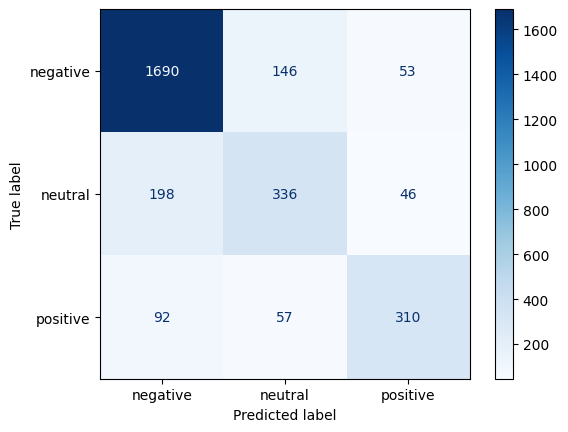

In [31]:
# Step 1: Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 2: Make predictions using the Logistic Regression model
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Predict with Logistic Regression model
y_pred = model.predict(X_test)

# Step 3: Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='weighted')  # Adjust 'average' based on your model (binary or multi-class)
recall_lr = recall_score(y_test, y_pred, average='weighted')  # Same here
f1_lr = f1_score(y_test, y_pred, average='weighted')  # Same here

# Step 4: Print Evaluation Metrics
print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression - Precision: {precision_lr:.4f}")
print(f"Logistic Regression - Recall: {recall_lr:.4f}")
print(f"Logistic Regression - F1-Score: {f1_lr:.4f}")

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot(cmap='Blues')

# **Naive Bayes Model**

### **Training the model**

In [ ]:
# Step 1: Import Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Step 2: Train the Naive Bayes model
nb_model = MultinomialNB()

# Train the model with training data
nb_model.fit(X_train, y_train)

MultinomialNB()

### **Evaluating the model (Classification by Cofusion Matrix)**

Naive Bayes - Accuracy: 0.7766
Naive Bayes - Precision: 0.7652
Naive Bayes - Recall: 0.7766
Naive Bayes - F1-Score: 0.7582


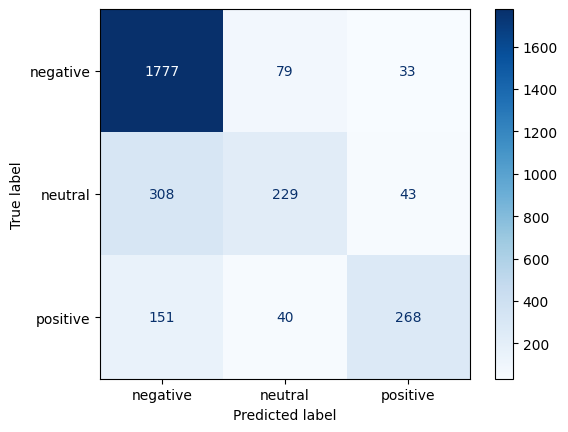

In [30]:
# Step 1: Import necessary libraries for evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

# Step 2: Train Naive Bayes model (if not done already)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Step 3: Predict with Naive Bayes model
y_pred_nb = nb_model.predict(X_test)

# Step 4: Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')  # Adjust 'average' based on your model (binary or multi-class)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')  # Same here
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')  # Same here

# Step 5: Print Evaluation Metrics
print(f"Naive Bayes - Accuracy: {accuracy_nb:.4f}")
print(f"Naive Bayes - Precision: {precision_nb:.4f}")
print(f"Naive Bayes - Recall: {recall_nb:.4f}")
print(f"Naive Bayes - F1-Score: {f1_nb:.4f}")

# Step 6: Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Display confusion matrix
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)
cm_display_nb.plot(cmap='Blues')

# **Model Comparison between Logistic Regression and Naive Bayes**

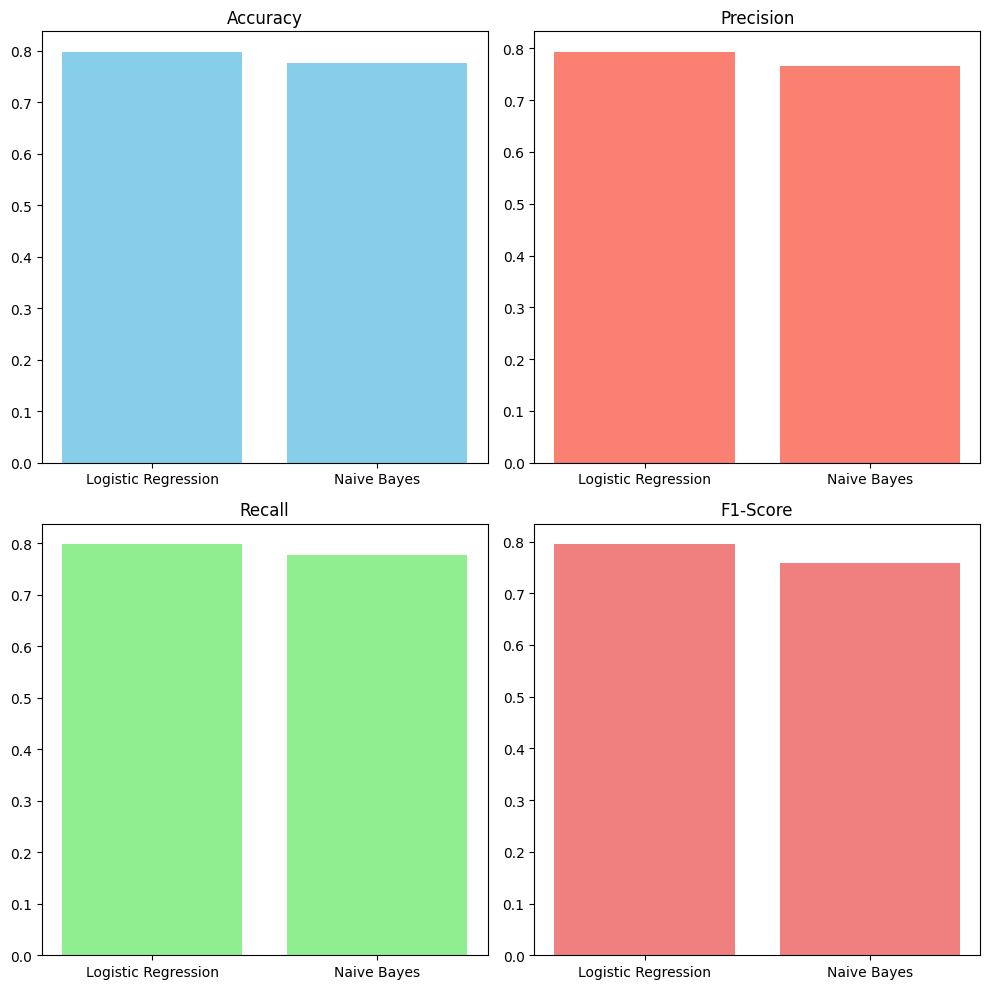

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming the Logistic Regression model is already trained and evaluated
# and the Naive Bayes model is also trained and evaluated

# Get the predictions for both models
y_pred_lr = model.predict(X_test)  # Logistic Regression prediction
y_pred_nb = nb_model.predict(X_test)  # Naive Bayes prediction

# Model Performance Metrics for Logistic Regression
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

# Model Performance Metrics for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Model names and performance metrics
models = ['Logistic Regression', 'Naive Bayes']
accuracy_scores = [accuracy, accuracy_nb]
precision_scores = [precision, precision_nb]
recall_scores = [recall, recall_nb]
f1_scores = [f1, f1_nb]

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Accuracy
axes[0, 0].bar(models, accuracy_scores, color='skyblue')
axes[0, 0].set_title("Accuracy")

# Precision
axes[0, 1].bar(models, precision_scores, color='salmon')
axes[0, 1].set_title("Precision")

# Recall
axes[1, 0].bar(models, recall_scores, color='lightgreen')
axes[1, 0].set_title("Recall")

# F1-Score
axes[1, 1].bar(models, f1_scores, color='lightcoral')
axes[1, 1].set_title("F1-Score")

plt.tight_layout()
plt.show()


In [ ]:
!pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install datasets

# **DistilBERT**

In [ ]:
!pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install datasets

In [ ]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Found existing installation: torch 2.5.1+cu124
Uninstalling torch-2.5.1+cu124:
  Successfully uninstalled torch-2.5.1+cu124
Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124
Found existing installation: torchaudio 2.5.1+cu124
Uninstalling torchaudio-2.5.1+cu124:
  Successfully uninstalled torchaudio-2.5.1+cu124
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 95.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 108.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [37]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from scipy.special import softmax

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/data/tweets_dataset/Tweets.csv")

# Ensure 'text' column is a string and remove NaNs
df['text'] = df['text'].astype(str)
df = df.dropna(subset=['text'])

# Map the 'airline_sentiment' labels to numeric values (0: positive, 1: neutral, 2: negative)
df['label'] = df['airline_sentiment'].map({'positive': 0, 'neutral': 1, 'negative': 2})

# Stratified Train-Test Split
train_data, test_data = train_test_split(
    df[['text', 'label']], test_size=0.2, stratify=df['label'], random_state=42
)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_data)
test_dataset = Dataset.from_pandas(test_data)

# Load DistilBERT Tokenizer and Model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

# Data Preprocessing Function
def preprocess_function(examples):
    return tokenizer(
        examples['text'],
        truncation=True,
        padding="max_length",
        max_length=256  # Increase max_length to capture more context
    )

# Tokenize datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

# Remove unnecessary columns
train_dataset = train_dataset.remove_columns(["text"])
test_dataset = test_dataset.remove_columns(["text"])

# Define Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(softmax(logits, axis=-1), axis=-1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "precision": precision_score(labels, predictions, average="weighted"),
        "recall": recall_score(labels, predictions, average="weighted"),
        "f1": f1_score(labels, predictions, average="weighted"),
    }

# Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,  # Increased learning rate
    per_device_train_batch_size=16,  # Increased batch size
    per_device_eval_batch_size=32,
    num_train_epochs=5,  # Increased number of epochs for better training
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    save_total_limit=2,
    load_best_model_at_end=True,
    fp16=True,  # Mixed precision for faster training on GPUs
    gradient_accumulation_steps=2,  # Gradient Accumulation to simulate larger batch sizes
    warmup_steps=100,  # Learning rate warm-up for smoother training
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Train the DistilBERT Model
trainer.train()

# Save the model after training
trainer.save_model("distilbert_model_tweets")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/11712 [00:00<?, ? examples/s]

Map:   0%|          | 0/2928 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-37-61eaf7ce374b>:80: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.896800,0.420665,0.832650,0.832518,0.832650,0.831282
2,0.685800,0.459248,0.839481,0.840720,0.839481,0.831655
3,0.434300,0.459342,0.841189,0.844824,0.841189,0.842711
4,0.249600,0.563663,0.843579,0.839599,0.843579,0.840971
5,0.217700,0.645707,0.840505,0.838593,0.840505,0.839387


In [45]:
model.save_pretrained('/content/drive/MyDrive/data/tweets_dataset/distilbert_Tweets_model')
tokenizer.save_pretrained('/content/drive/MyDrive/data/tweets_dataset/distilbert_Tweets_model')

('/content/drive/MyDrive/data/tweets_dataset/distilbert_Tweets_model/tokenizer_config.json',
 '/content/drive/MyDrive/data/tweets_dataset/distilbert_Tweets_model/special_tokens_map.json',
 '/content/drive/MyDrive/data/tweets_dataset/distilbert_Tweets_model/vocab.txt',
 '/content/drive/MyDrive/data/tweets_dataset/distilbert_Tweets_model/added_tokens.json')

# **Model Performance Comparison**

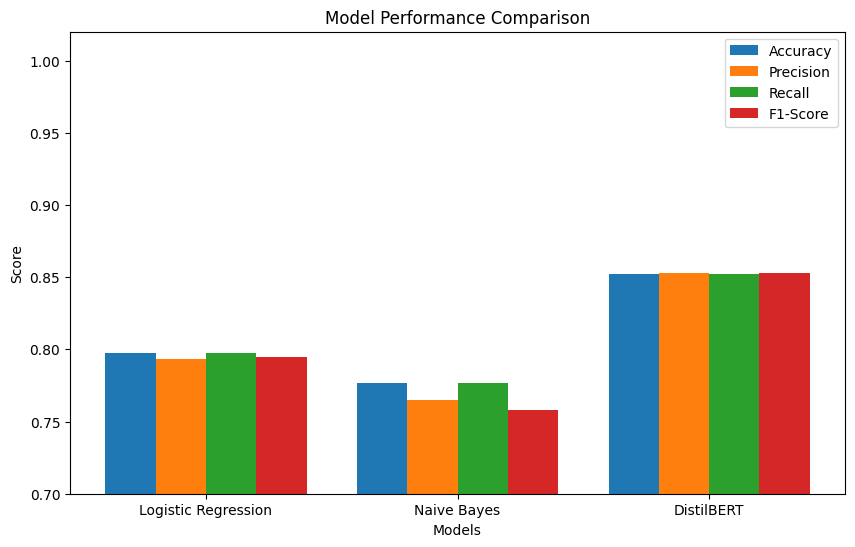

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ["Logistic Regression", "Naive Bayes", "DistilBERT"]

# Performance metrics
accuracy = [0.7978, 0.7766, 0.8525]  # Logistic Regression, Naive Bayes, DistilBERT
precision = [0.7930, 0.7652, 0.8528]  # Logistic Regression, Naive Bayes, DistilBERT
recall = [0.7978, 0.7766, 0.8525]  # Logistic Regression, Naive Bayes, DistilBERT
f1_score = [0.7945, 0.7582, 0.8526]  # Logistic Regression, Naive Bayes, DistilBERT

# Create a grouped bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [accuracy, precision, recall, f1_score]

x = np.arange(len(models))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i * width - width * 1.5, values[i], width, label=metric)

# Formatting
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0.7, 1.02)  # Set y-axis limit for better visualization
plt.show()

NameError: name 'distilbert_model' is not defined

In [42]:
pip install lime torch transformers datasets scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ad229e0c58603364a58623feb193785c2c1dec1d4e7c061554c7e0a05f0ad76b
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [43]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from lime.lime_text import LimeTextExplainer
import torch

# Load DistilBERT Model & Tokenizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2).to(device)

# Prediction Function
def predict_proba(texts):
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1).cpu().numpy()
    return probs

# Initialize LIME Explainer
explainer = LimeTextExplainer(class_names=["Negative", "Positive"])

# Test Example
sample_text = "The flight was delayed but the service was excellent."

# Generate Explanation
exp = explainer.explain_instance(sample_text, predict_proba, num_features=10)

# Show Explanation
exp.show_in_notebook()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [53]:
import os

model_path = "/content/drive/MyDrive/data/tweets_dataset/distilbert_Tweets_model"
print(os.listdir(model_path))

['config.json', 'model.safetensors', 'tokenizer_config.json', 'special_tokens_map.json', 'vocab.txt']


DistilBertSdpaAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


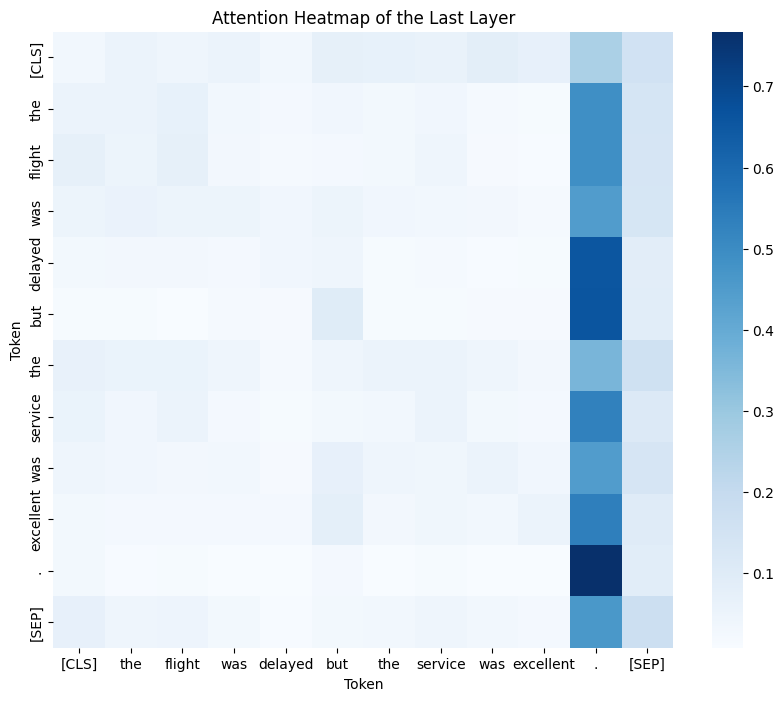

In [54]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load Model & Tokenizer
model_path = '/content/drive/MyDrive/data/tweets_dataset/distilbert_Tweets_model'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path, output_attentions=True)

# Prepare the text
text = "The flight was delayed but the service was excellent."

# Tokenize text and get model's attention weights
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
with torch.no_grad():
    outputs = model(**inputs)

# Extract attention weights from the last layer
attentions = outputs.attentions
last_layer_attention = attentions[-1]  # Last attention layer
attention_weights = last_layer_attention.mean(dim=1).squeeze().cpu().numpy()

# Tokenized words
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Plotting the attention heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, cmap='Blues', cbar=True)
plt.title('Attention Heatmap of the Last Layer')
plt.xlabel('Token')
plt.ylabel('Token')
plt.show()